## 데이터 loading

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets


In [36]:
mnist = datasets.mnist

In [37]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [38]:
train_x.shape, train_y.shape     # 기출문제 같은것 총 6만장

((60000, 28, 28), (60000,))

In [39]:
test_x.shape, test_y.shape       # 시험문제 같은것 총 1만장

((10000, 28, 28), (10000,))

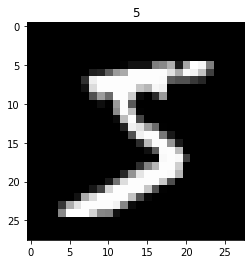

In [40]:
plt.title(train_y[0])
plt.imshow(train_x[0], 'gray')
plt.show()

## Layer

In [41]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [128]:
img8 = train_x[0:8]

In [129]:
img8.shape

(8, 28, 28)

In [130]:
print(type(img8.shape))

<class 'tuple'>


In [131]:
img8.shape      # 입력을 무적권 4차원으로, float 형태로 넣어줘야 한다

(8, 28, 28)

In [132]:
layer = tf.keras.layers.Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='SAME', activation="relu")

In [133]:
img8.dtype

dtype('uint8')

In [134]:
img8 = tf.cast(img8, dtype=tf.float32)

In [106]:
img8.dtype

tf.float32

In [113]:
output = layer(img8)

In [116]:
output.shape    # 필터가 3개가 적용이 되어서 마지막에 3이 나옴 즉, 채널 3개짜리가 8장이 나왔다~

TensorShape([8, 28, 28, 4])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1b9dec66c10>)

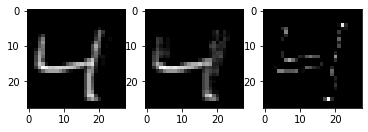

In [121]:
index = 2
plt.subplot(1, 3, 1), plt.imshow(output[index, :, :, 0], 'gray')
plt.subplot(1, 3, 2), plt.imshow(output[index, :, :, 1], 'gray')
plt.subplot(1, 3, 3), plt.imshow(output[index, :, :, 2], 'gray')
# plt.subplot(1, 3, 4), plt.imshow(output[index, :, :, 3], 'gray')

In [122]:
weight = layer.get_weights()

In [123]:
type(weight), len(weight)

(list, 2)

In [124]:
weight

[array([[[[ 0.22390145,  0.33898818, -0.16720198, -0.2513033 ]],
 
         [[ 0.35066712,  0.09119412,  0.34771442,  0.19424582]],
 
         [[ 0.3226118 ,  0.23293847, -0.05732936, -0.00250727]]],
 
 
        [[[-0.2824306 , -0.17390433, -0.11852227,  0.05868486]],
 
         [[ 0.13184959,  0.13268062, -0.30234063,  0.2864921 ]],
 
         [[ 0.18207836,  0.22775626, -0.28702578, -0.04822952]]],
 
 
        [[[-0.2222983 , -0.10625717,  0.25866187,  0.24488926]],
 
         [[-0.08569223, -0.2548464 , -0.05877173,  0.3484946 ]],
 
         [[-0.11346698, -0.17268586, -0.00158995, -0.09986049]]]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [125]:
weight[0]

array([[[[ 0.22390145,  0.33898818, -0.16720198, -0.2513033 ]],

        [[ 0.35066712,  0.09119412,  0.34771442,  0.19424582]],

        [[ 0.3226118 ,  0.23293847, -0.05732936, -0.00250727]]],


       [[[-0.2824306 , -0.17390433, -0.11852227,  0.05868486]],

        [[ 0.13184959,  0.13268062, -0.30234063,  0.2864921 ]],

        [[ 0.18207836,  0.22775626, -0.28702578, -0.04822952]]],


       [[[-0.2222983 , -0.10625717,  0.25866187,  0.24488926]],

        [[-0.08569223, -0.2548464 , -0.05877173,  0.3484946 ]],

        [[-0.11346698, -0.17268586, -0.00158995, -0.09986049]]]],
      dtype=float32)

In [135]:
weight[0].shape, weight[1].shape

((3, 3, 1, 4), (4,))

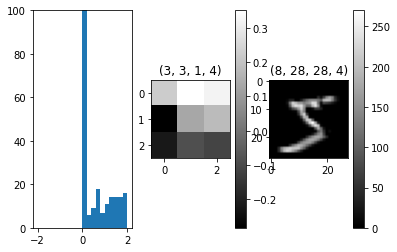

In [147]:
plt.subplot(1, 3, 1)
plt.hist(output.numpy().reshape(-1), bins=20, range=[-2,2])    #
plt.ylim(0, 100)                                               # 축의범위
plt.subplot(1, 3, 2)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')                         # 숫자를 밝기로 표현
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title(output.shape)                                       
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [148]:
type(output)

tensorflow.python.framework.ops.EagerTensor

In [150]:
relulayer = tf.keras.layers.ReLU()
result = relulayer(output)

In [152]:
type(result)

tensorflow.python.framework.ops.EagerTensor

In [158]:
# pool_size = pooling에 사용할 filter의 크기를 정하는 것. 정수, 튜플형태
# strides = pooling에 사용할 filter의 크기의 strides를 정하는 것.
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same")
pool_output = pool_layer(result)

In [157]:
result.shape, pool_output.shape             # pooling 의 목적
                                            # input size를 줄인다

(TensorShape([8, 28, 28, 4]), TensorShape([8, 14, 14, 4]))